# Analyse the Popularity of Different Programming Languages over Time

The oldest programming language still in use today is FORTRAN, which was developed in 1957. Since then many other programming languages have been developed. But which programming language is the most popular?

StackOverflow will help us answer this burning question. Each post on Stack OverFlow comes with a Tag. And this Tag can be the name of a programming language.

![PNG](intro.png)

## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

```SQL
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
```

### Import Statements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Exploration

### Read the .csv file and store it in a Pandas dataframe

In [2]:
df = pd.read_csv("QueryResults.csv", sep=",", names=["DATE", "TAG", "POSTS"], header=0)

### Examine the first 5 rows and the last 5 rows of the of the dataframe

In [3]:
print("First 5 rows of data")
df.head()

First 5 rows of data


,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,javascript,163
3,2008-08-01 00:00:00,c,84
4,2008-08-01 00:00:00,python,124


In [4]:
print("Last 5 rows of data")
df.tail()

Last 5 rows of data


,DATE,TAG,POSTS
2169,2021-08-01 00:00:00,perl,122
2170,2021-08-01 00:00:00,r,4630
2171,2021-08-01 00:00:00,php,4799
2172,2021-08-01 00:00:00,swift,2238
2173,2021-08-01 00:00:00,ruby,512


### Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [5]:
df.shape

(2174, 3)

### Count the number of entries in each column of the dataframe

In [6]:
df.count(axis=0, level=None, numeric_only=False)

DATE     2174
TAG      2174
POSTS    2174
dtype: int64

### Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [7]:
rankings_by_posts = df.groupby('TAG').sum()
rankings_by_posts.sort_values('POSTS', ascending=False)

,POSTS
TAG,
javascript,2258874
java,1792737
python,1780305
c#,1493265
php,1410671
c++,734542
r,416008
c,363370
swift,300807



### How many months of data exist per language? Which language had the fewest months with an entry? 

Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

In [8]:
df.groupby('TAG').count()

,DATE,POSTS
TAG,,
assembly,157,157
c,157,157
c#,158,158
c++,157,157
delphi,157,157
go,142,142
java,157,157
javascript,157,157
perl,157,157


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [9]:
df.DATE[1]

'2008-08-01 00:00:00'

In [10]:
pd.to_datetime(df.DATE[1])

Timestamp('2008-08-01 00:00:00')

In [11]:
df.DATE = pd.to_datetime(df.DATE)
df.head()

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,javascript,163
3,2008-08-01,c,84
4,2008-08-01,python,124


## Data Manipulation



In [12]:
pivoted_table = df.pivot(index='DATE', columns="TAG", values="POSTS")
pivoted_table.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,84.0,507.0,164.0,14.0,NaN,222.0,163.0,28.0,160.0,124.0,NaN,71.0,NaN
2008-09-01,28.0,320.0,1648.0,754.0,105.0,NaN,1136.0,639.0,131.0,480.0,540.0,6.0,289.0,NaN
2008-10-01,15.0,303.0,1989.0,810.0,112.0,NaN,1154.0,726.0,127.0,615.0,510.0,NaN,249.0,NaN
2008-11-01,17.0,259.0,1733.0,734.0,141.0,NaN,958.0,579.0,97.0,503.0,452.0,1.0,159.0,NaN


### What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [13]:
pivoted_table.shape

(158, 14)

In [14]:
pivoted_table.tail()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2021-04-01,344.0,2453.0,6768.0,4343.0,186.0,683.0,9525.0,18671.0,143.0,5118.0,26540.0,5614.0,605.0,2528.0
2021-05-01,326.0,2257.0,6570.0,4597.0,179.0,700.0,9713.0,18473.0,122.0,5093.0,26118.0,5403.0,446.0,2212.0
2021-06-01,280.0,2008.0,6448.0,4191.0,133.0,646.0,9255.0,17714.0,157.0,4895.0,24618.0,4954.0,470.0,2127.0
2021-07-01,192.0,1725.0,5966.0,3812.0,148.0,651.0,8400.0,17481.0,140.0,4658.0,24261.0,4686.0,500.0,2282.0
2021-08-01,171.0,1662.0,5952.0,3568.0,141.0,805.0,8183.0,17420.0,122.0,4799.0,23627.0,4630.0,512.0,2238.0


In [15]:
pivoted_table.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

### Count the number of entries per programming language. Why might the number of entries be different? 

In [16]:
pivoted_table.count(axis=0, level=None, numeric_only=False)

TAG
assembly      157
c             157
c#            158
c++           157
delphi        157
go            142
java          157
javascript    157
perl          157
php           157
python        157
r             155
ruby          157
swift         149
dtype: int64

In [17]:
pivoted_table.fillna(0, inplace=True)

In [18]:
pivoted_table.isna().values.any()

False

## Data Visualisaton with with Matplotlib


### Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

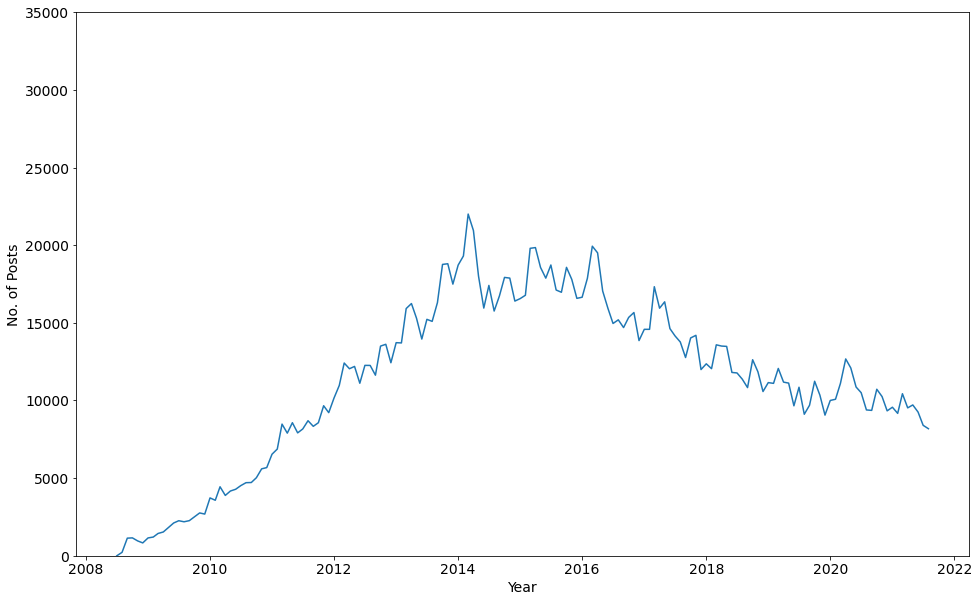

In [19]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('No. of Posts', fontsize=14)
plt.ylim(0, 35000)
plt.plot(pivoted_table.index, pivoted_table.java)

### Show two line (e.g. for Javascript and Python) on the same chart.

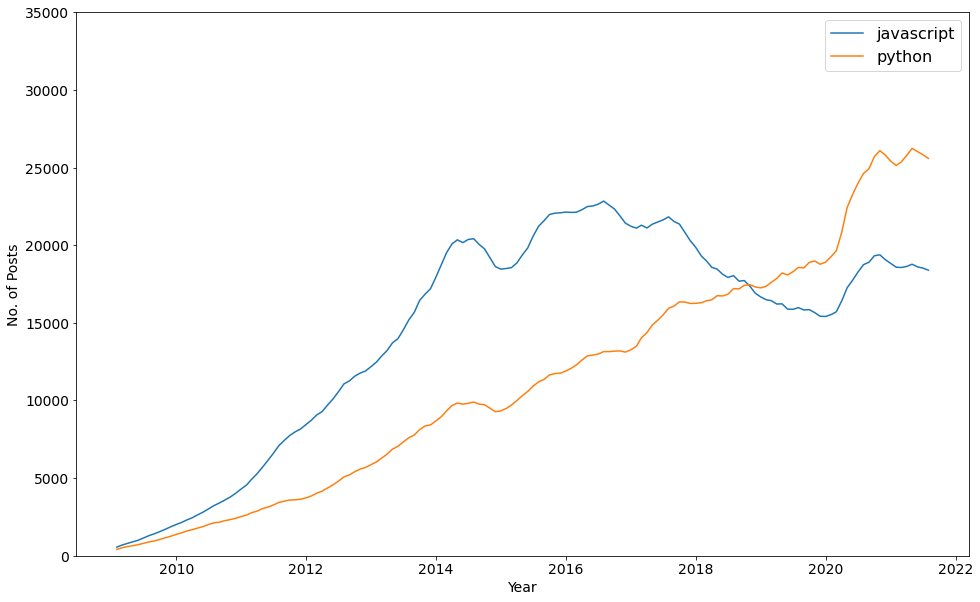

In [20]:
roll_df = pivoted_table.rolling(window=8).mean()
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('No. of Posts', fontsize=14)
plt.ylim(0, 35000)
plt.plot(roll_df.index, roll_df.javascript, label=roll_df.javascript.name)
plt.plot(roll_df.index, roll_df.python, label=roll_df.python.name)
plt.legend(fontsize=16)
 

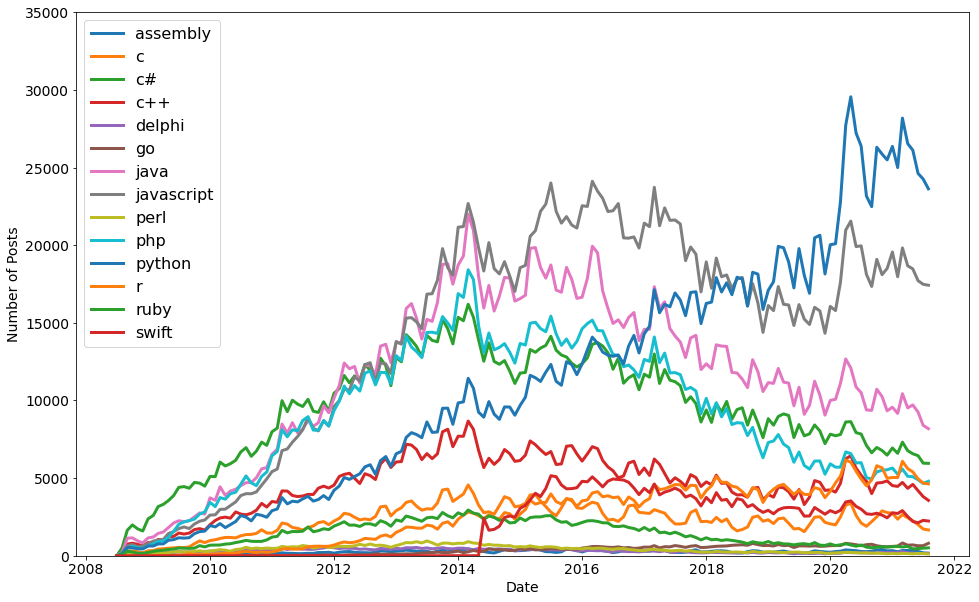

In [21]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
 
for column in pivoted_table.columns:
    plt.plot(pivoted_table.index, pivoted_table[column], 
             linewidth=3, label=pivoted_table[column].name)
 
plt.legend(fontsize=16)

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

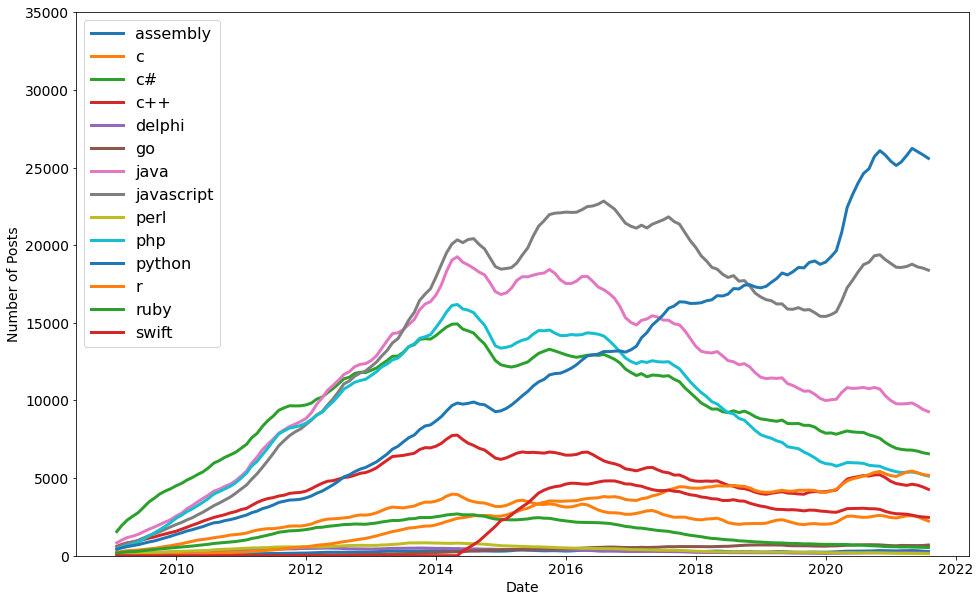

In [22]:
roll_df = pivoted_table.rolling(window=8).mean()
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
 
# plot the roll_df instead
for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column], 
             linewidth=3, label=roll_df[column].name)
 
plt.legend(fontsize=16)

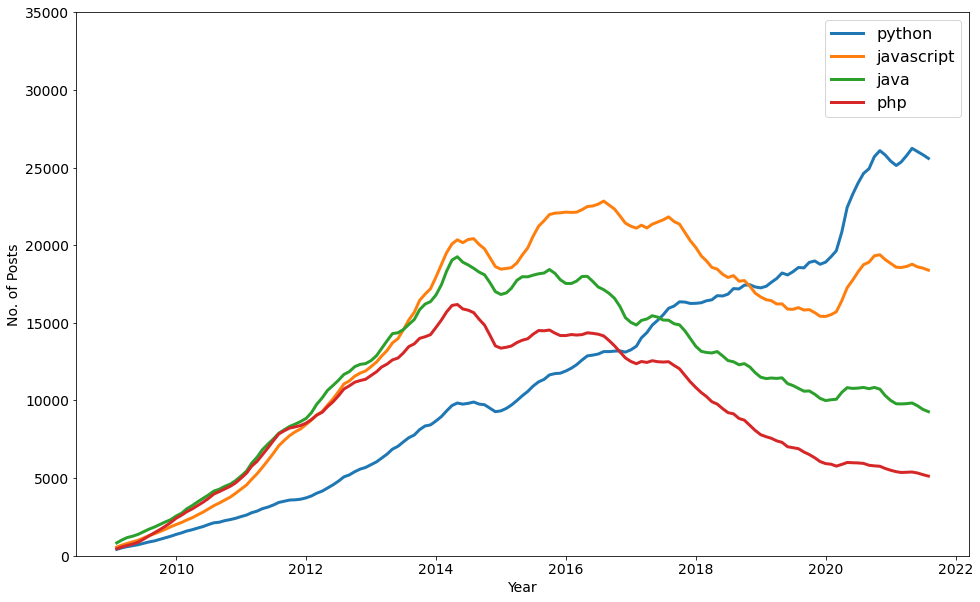

In [23]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('No. of Posts', fontsize=14)
plt.ylim(0, 35000)
data=['python', 'javascript', 'java', 'php']
for column in data:
    plt.plot(roll_df.index, roll_df[column], 
             linewidth=3, label=roll_df[column].name)
plt.legend(fontsize=16)